# Welcome to Jupyter!

In [1]:
"""
CSCC11 - Introduction to Machine Learning, Fall 2021, Assignment 2
M. Ataei
"""
from sklearn.metrics import pairwise_distances_argmin

import numpy as np

class KMeans:
    def __init__(self, init_centers):
        """ This class represents the K-means model.

        TODO: You will need to implement the methods of this class:
        - train: ndarray, int -> ndarray

        Implementation description will be provided under each method.

        For the following:
        - N: Number of samples.
        - D: Dimension of input features.
        - K: Number of centers.
             NOTE: K > 1

        Args:
        - init_centers (ndarray (shape: (K, D))): A KxD matrix consisting K D-dimensional centers.
        """

        assert len(init_centers.shape) == 2, f"init_centers should be a KxD matrix. Got: {init_centers.shape}"
        (self.K, self.D) = init_centers.shape
        assert self.K > 1, f"There must be at least 2 clusters. Got: {self.K}"

        # Shape: K x D
        self.centers = np.copy(init_centers)

    def train(self, train_X, max_iterations=1000):
        """ This method trains the K-means model.

        NOTE: This method updates self.centers

        The algorithm is the following:
        - Assigns data points to the closest cluster center.
        - Re-computes cluster centers based on the data points assigned to them.
        - Update the labels array to contain the index of the cluster center each point is assigned to.
        - Loop ends when the labels do not change from one iteration to the next. 

        Args:
        - train_X (ndarray (shape: (N, D))): A NxD matrix consisting N D-dimensional input data.
        - max_iterations (int): Maximum number of iterations.

        Output:
        - labels (ndarray (shape: (N, 1))): A N-column vector consisting N labels of input data.
        """
        assert len(train_X.shape) == 2 and train_X.shape[1] == self.D, f"train_X should be a NxD matrix. Got: {train_X.shape}"
        assert max_iterations > 0, f"max_iterations must be positive. Got: {max_iterations}"
        N = train_X.shape[0]

        labels = np.empty(shape=(N, 1), dtype=np.long)
        distances = np.empty(shape=(N, self.K))
        
        #print(distances)
        for _ in range(max_iterations):
            
            old_labels = labels
            
         #   print(labels)

            # ====================================================
            # TODO: Implement your solution within the box
            
            print(self.K, "NUMBER OF CENTERS")
            
            print(N, "NUMBER OF DATA POINTS")
            
                
            print(self.D, "NUMBER OF DIMINSIONS")
            for i in range(len(train_X)):
                for j in range(len(self.centers)):
                    distances[i][j]=np.linalg.norm(train_X[i]-self.centers[j])
                    curmin=distances[i].min(axis=0)
                
                    index=list(distances[i]).index(curmin)
                labels[i]=index
                    
         
                                                                        
    

            # ====================================================
            
            print(distances)
            
        
            
            print("HERE ARE THE LABELS", labels)

            # Check convergence #print(distances)
            if np.allclose(old_labels, labels):
                break

        return labels



In [ ]:
"""
CSCC11 - Introduction to Machine Learning, Fall 2021, Assignment 2
M. Ataei


This is a test script for clustering methods.
"""

import _pickle as pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

from functools import partial

from gmm import GMM
from kmeans import KMeans

def test_all(base_path, tests, test_method, visualize=False):
    assert test_method in ['kmeans', 'gmm', 'all'], f"Only support methods: {['kmeans', 'gmm', 'all']}. Got: {test_method}"
    run_experiment = partial(run_test, visualize=visualize, test_method=test_method)
    for test in tests:
        data_path = os.path.join(base_path, test)
        assert os.path.isfile(data_path)
        run_experiment(data_path=data_path)

def run_test(data_path, test_method, visualize=False):
    with open(data_path, "rb") as f:
        test_data = pickle.load(f)

    kmeans_enabled = False
    gmm_enabled = False
    num_plots = 1

    if test_method in ['kmeans', 'all']:
        test_kmeans(test_data)
        kmeans_labels = test_data["kmeans_labels"].flatten()
        kmeans_enabled = True
        num_plots += 1

    if test_method in ['gmm', 'all']:
        test_gmm(test_data)
        gmm_labels = test_data["gmm_labels"].flatten()
        gmm_enabled = True
        num_plots += 1

    if visualize:
        K = test_data["init_centers"].shape[0]
        fig = plt.figure(figsize=(5, 10))
        ax = fig.add_subplot(num_plots, 1, 1)

        for cluster_i in range(K):
            ax.set_title("Original")
            ax.scatter(test_data['data'][:, 0],
                       test_data['data'][:, 1])
            ax.scatter(test_data["gmm_centers"][:, 0], test_data["gmm_centers"][:, 1], c="black")
            ax.scatter(test_data["kmeans_centers"][:, 0], test_data["kmeans_centers"][:, 1], c="black", marker="x")
        ax = fig.add_subplot(num_plots, 1, 2)
        
        if kmeans_enabled:
            for cluster_i in range(K):
                ax.set_title("KMeans")
                ax.scatter(test_data['data'][kmeans_labels == cluster_i, 0],
                        test_data['data'][kmeans_labels == cluster_i, 1])
                ax.scatter(test_data["kmeans_centers"][:, 0], test_data["kmeans_centers"][:, 1], c="black")

            if gmm_enabled:
                ax = fig.add_subplot(num_plots, 1, 3)

        if gmm_enabled:
            for cluster_i in range(K):
                ax.set_title("GMM")
                ax.scatter(test_data['data'][gmm_labels == cluster_i, 0],
                        test_data['data'][gmm_labels == cluster_i, 1])
                ax.scatter(test_data["gmm_centers"][:, 0], test_data["gmm_centers"][:, 1], c="black")

        plt.show()


def test_kmeans(test_data):
    model = KMeans(test_data["init_centers"])
    labels = model.train(test_data["data"])

  #  assert np.allclose(model.centers, test_data["kmeans_centers"])
  #  assert np.allclose(labels, test_data["kmeans_labels"])

def test_gmm(test_data):
    model = GMM(test_data["init_centers"])
    labels = model.train(test_data["data"])

    assert np.allclose(model.centers, test_data["gmm_centers"])
    assert np.allclose(model.covariances, test_data["gmm_covariances"])
    assert np.allclose(model.mixture_proportions, test_data["gmm_mixture_proportions"])
    assert np.allclose(labels, test_data["gmm_labels"])


if __name__ == "__main__":
    base_path = "../data/"
    tests = [f"test_{i}.pkl" for i in range(1,6)]

    # Test methods: kmeans, gmm, all
    test_method = "kmeans"

    # Whether or not to visualize clusters
    visualize = True

    test_all(base_path, tests, test_method, visualize)


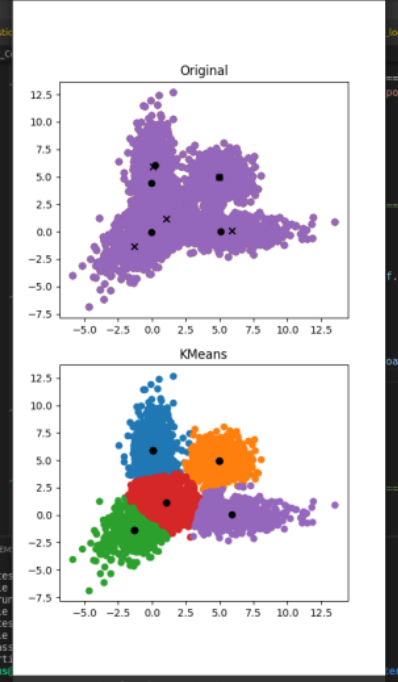

# How sparse are the document term vectors (i.e. on average, how many of the entries in each vector are zero)?

Nearly all the terms are zero, expect for one non-zero entry per vector.

# What are the 10 most common terms? What are the 10 least common terms?



# What is the average value for word-frequencies? (only counting vector entries that are non-zero).


# Step 1: Run the document clustering script with K = 5, norm_flag = 0, diffuse = 0, and random center initialization (see center_initializations.py). This will apply your K-Means clustering code to the original input vectors. The result will be stored in the results directory with the correspond experiment configurationyou used. Inspect the resulting clusters, labels and record: 1. Can you figure out which topics the clusters represent? 2. What are the factors that make clustering difficult? 3. Should we expect better results if we get a lucky guess at the cluster centers?




# Can you figure out which topics the clusters represent?

The topics or centroids repesent the mean of the data points surrounding the topic.


# What are the factors that make clustering difficult?

THe data should be spherical and non-overlapping in order to be able to perform the clustering algorithm effectively. If we tried clustering on data that is not spherical and overlapping, then this can lead to undesirable  when the clusters are elongated in certain directions.


# Should we expect better results if we get a lucky guess at the cluster centers?

Yes, the output of the clusters in highly dependent on the intial guess at the cluster centers. If we start with less centroids, or the same number but with different starting centroids then our results could get better if we get a luckly guess.


# What problem in Step 1 does this solve?

This solves the noise issue of the original dataset. Before in Step 1, there were many inconsistencies 
With the data as well as the noise that was increasing the error. After invoking normalization, better quality
Clusters are generated in order to improve the efficiency of clustering algorithms, 


# Based on the data points in each cluster, what do you think topics for these clusters?

The topics or centroids repesent the mean of the data points surrounding the topic.


# Would you consider this result better or worse than Step 1? Why?

I would consider this result better than Step 1, since we want clusters that are suitable for the datapoints
Associated with it. We can see that the new clusters generated by using normalization achieves this result.
Euclidean distance in general is very sensitive to changes in the distances. So by applying normalization
We reduce the sensitivity on the euclidean distance.


# What would you say are the topics for clusters?

The topics or centroids repesent the mean of the data points surrounding the topic.


# Why is the clustering suddenly better?

The clustering is much better due to the fact that random-walk diffusion is based on word co-occurrence probabilities. This means that pre-processed vectors will contain words that are strongly associated with those originally in the document and as a result the clusters generated are much more concise.


# What would you say is the general lesson to be learned from trying to cluster high-dimensional sparse data?

It can be difficult to cluster high-dimensional sparse data completely accurately. In fact, there is term for this
known as the curse of dimensionality.  It basically states that when dimsenionality increases just a bit, the
Volume of the sparse data increases so exponentially quickly that the available data becomes very sparse 
And somewhat complicated to cluster.

